<a href="https://colab.research.google.com/github/Izu-33/coffee-health-stress-prediction/blob/main/non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress Detector from Lifestyle Data

<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/8119432/12837956/c228ad25f528481a4b528463f8946656/dataset-cover.jpg?t=2025-08-22-15-29-36"
       alt="global coffee health dataset" width="800"/>
</p>

### Introduction

Stress is a growing health challenge influenced by lifestyle factors like caffeine intake, sleep, and physical activity. The Global Coffee Health Dataset (10,000 records from 20 countries) captures these patterns, making it useful for wellness-focused analysis.

### Problem Statement

This project aims to predict stress levels (Low, Medium, High) from lifestyle and health indicators. By modeling these relationships, we explore how daily habits impact well-being and show how machine learning can support stress awareness in real life.

### Dataset

The dataset used for this project is the Global Coffee Health Dataset sourced from Kaggle, which contains 10,000 synthetic records from 20 countries, capturing demographics, lifestyle habits (coffee, sleep, activity, smoking, alcohol), and health indicators (BMI, heart rate, stress).
Link to dataset: [Link](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset/data)

## Install dependencies

In [1]:
!pip -q install kaggle

## Load secrets

In [2]:
from google.colab import userdata
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

## Download dataset from Kaggle

In [3]:
!kaggle datasets download -d uom190346a/global-coffee-health-dataset
!unzip global-coffee-health-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset
License(s): CC0-1.0
  0% 0.00/184k [00:00<?, ?B/s]
100% 184k/184k [00:00<00:00, 409MB/s]
Archive:  global-coffee-health-dataset.zip
  inflating: synthetic_coffee_health_10000.csv  


## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [11]:
health_df = pd.read_csv("./synthetic_coffee_health_10000.csv")
health_df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## Exploratory Data Analysis (EDA)

In [12]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

> The feature **`Health_Issues`** has ~60% missing values and is highly correlated with stress. To avoid introducing bias and ensure model reliability, we drop this column from the analysis.
> **`Sleep_Quality`** is derived from **`Sleep_Hours`** (strongly correlated)
> **`ID`** is just a unique identifier, carries no predictive information.
> **`Coffee_Intake`** and **`Caffeine_mg`** are basically proportional. Since the dataset and problem statement is framed around health outcomes (stress, sleep, BMI, etc.), **`Caffeine_mg`** is a good choice for a feature because it is standardized and aligns better with published research.

#### Columns to drop:
- **`ID`**
- **`Health_Issues`**
- **`Sleep_Quality`** (since **`Sleep_Hours`** already covers it)
- **`Coffee_Intake`**

In [13]:
cols_to_drop = ['ID', 'Health_Issues', 'Sleep_Quality', 'Coffee_Intake']
health_df = health_df.drop(columns=cols_to_drop)

print(health_df.shape)
print(health_df.info())
print(health_df.isnull().sum())
health_df.describe(include="all")

(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Caffeine_mg              10000 non-null  float64
 4   Sleep_Hours              10000 non-null  float64
 5   BMI                      10000 non-null  float64
 6   Heart_Rate               10000 non-null  int64  
 7   Stress_Level             10000 non-null  object 
 8   Physical_Activity_Hours  10000 non-null  float64
 9   Occupation               10000 non-null  object 
 10  Smoking                  10000 non-null  int64  
 11  Alcohol_Consumption      10000 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 937.6+ KB
None
Age                        0
Gender                    

,Age,Gender,Country,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.00000,10000,10000.00000,10000.000000
unique,NaN,3,20,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN
top,NaN,Female,Canada,NaN,NaN,NaN,NaN,Low,NaN,Office,NaN,NaN
freq,NaN,5001,543,NaN,NaN,NaN,NaN,6989,NaN,2073,NaN,NaN
mean,34.949100,NaN,NaN,238.411010,6.636220,23.986860,70.617800,NaN,7.48704,NaN,0.20040,0.300700
std,11.160939,NaN,NaN,137.748815,1.222055,3.906411,9.822951,NaN,4.31518,NaN,0.40032,0.458585
min,18.000000,NaN,NaN,0.000000,3.000000,15.000000,50.000000,NaN,0.00000,NaN,0.00000,0.000000
25%,26.000000,NaN,NaN,138.750000,5.800000,21.300000,64.000000,NaN,3.70000,NaN,0.00000,0.000000
50%,34.000000,NaN,NaN,235.400000,6.600000,24.000000,71.000000,NaN,7.50000,NaN,0.00000,0.000000
75%,43.000000,NaN,NaN,332.025000,7.500000,26.600000,77.000000,NaN,11.20000,NaN,0.00000,1.000000


Target Variable Distribution (**`Stress_Level`**)

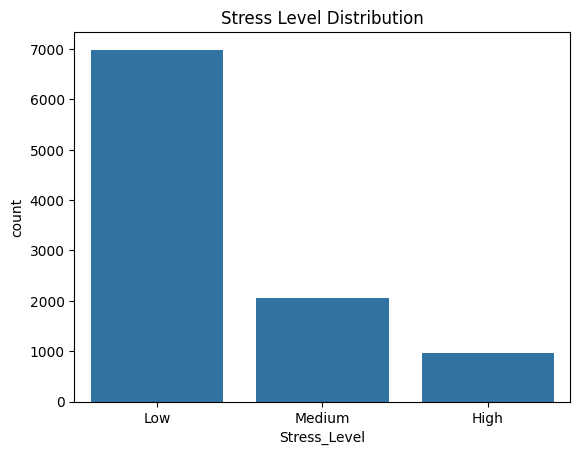

In [14]:
sns.countplot(x="Stress_Level", data=health_df)
plt.title("Stress Level Distribution")
plt.show()

In [15]:
print(health_df["Stress_Level"].value_counts(normalize=True))

Stress_Level
Low       0.6989
Medium    0.2050
High      0.0961
Name: proportion, dtype: float64


Numerical Features Analysis

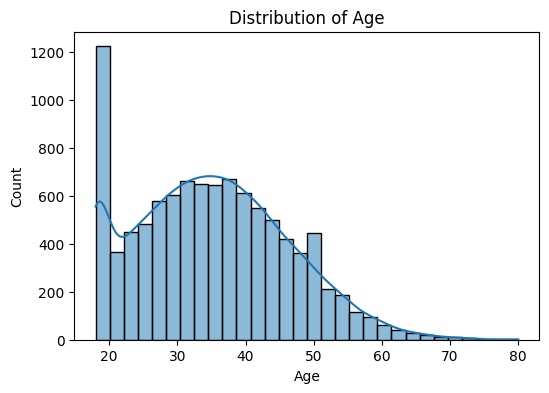

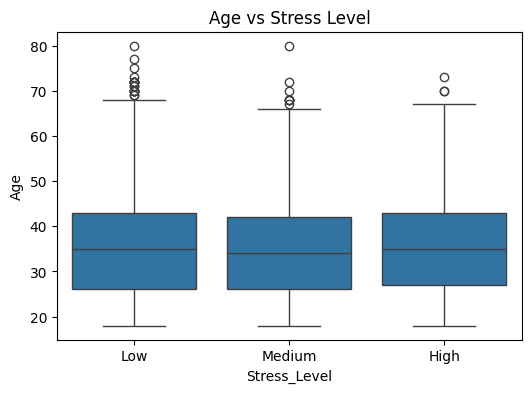

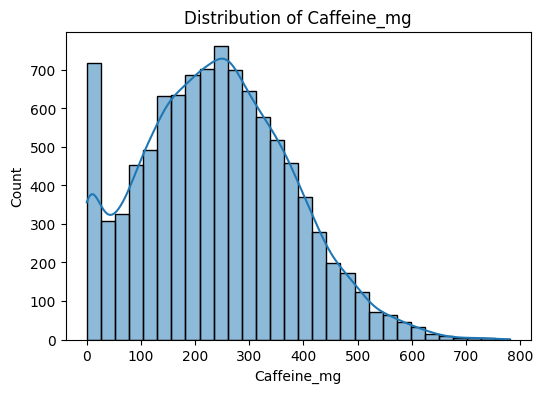

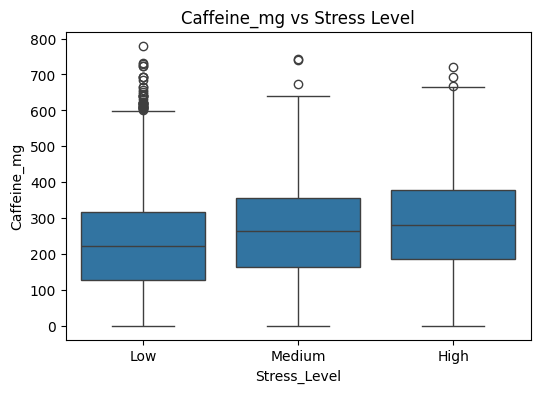

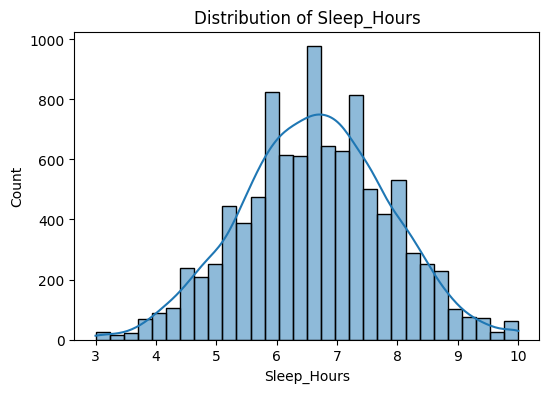

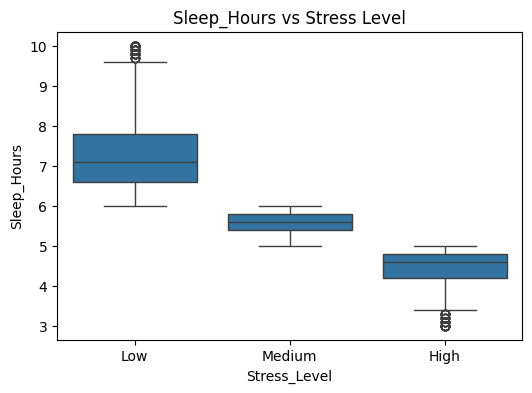

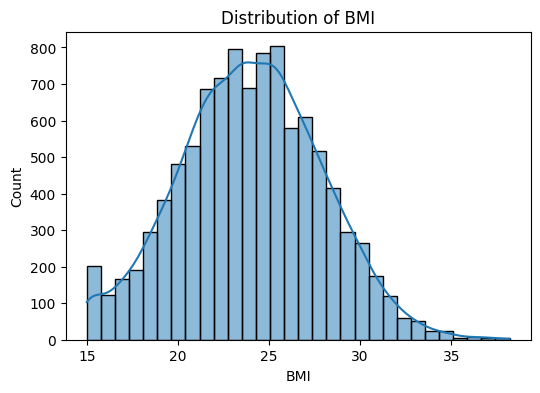

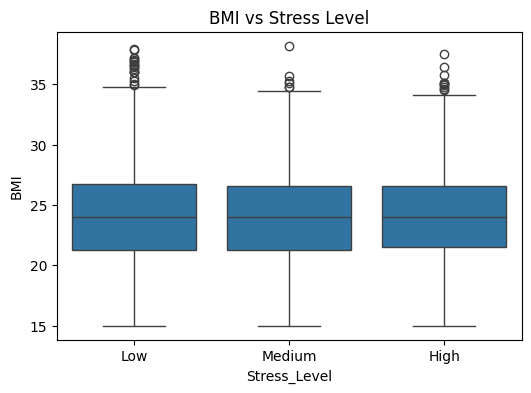

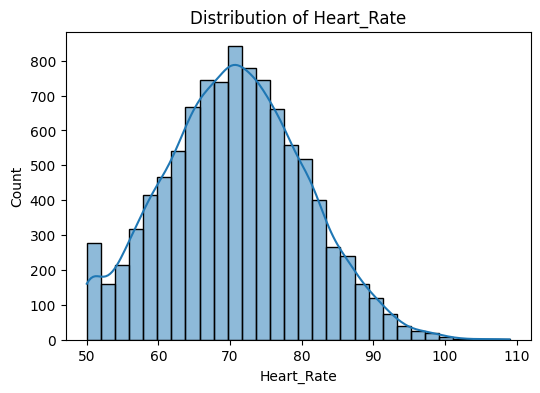

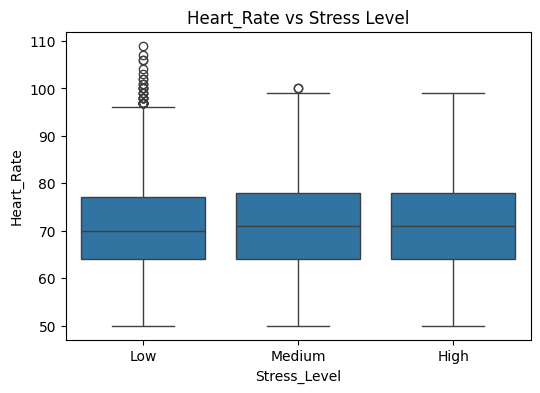

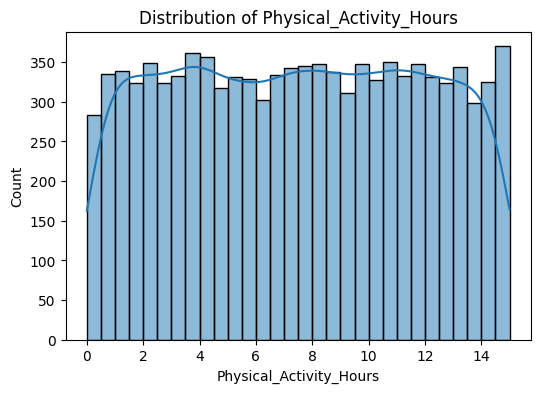

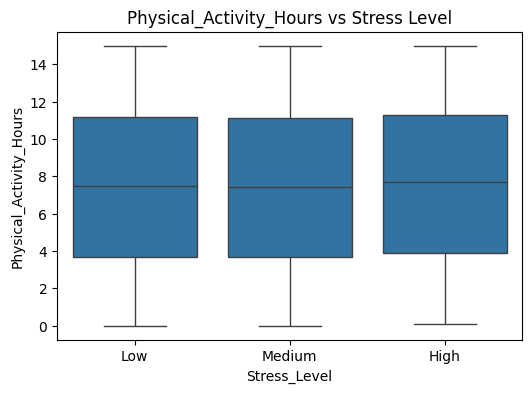

In [16]:
num_cols = ["Age", "Caffeine_mg", "Sleep_Hours",
            "BMI", "Heart_Rate", "Physical_Activity_Hours"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(health_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x="Stress_Level", y=col, data=health_df)
    plt.title(f"{col} vs Stress Level")
    plt.show()

Categorical Features Analysis

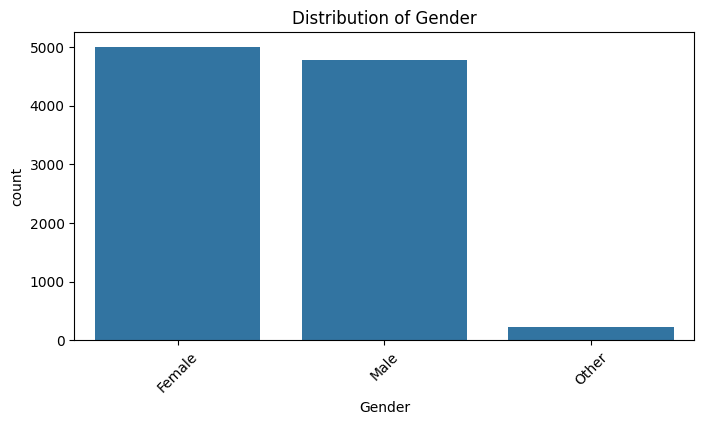

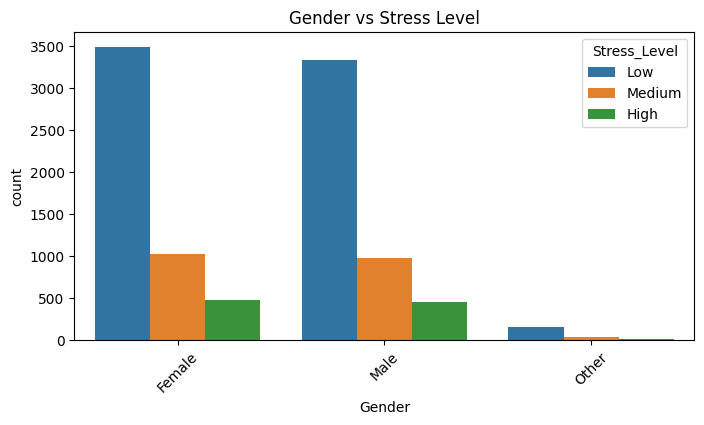

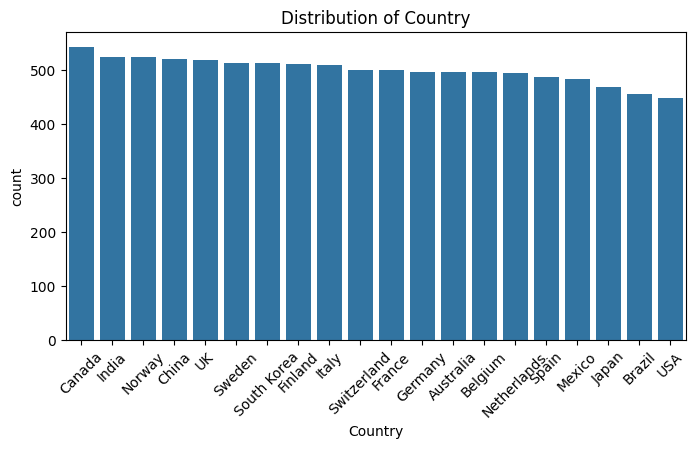

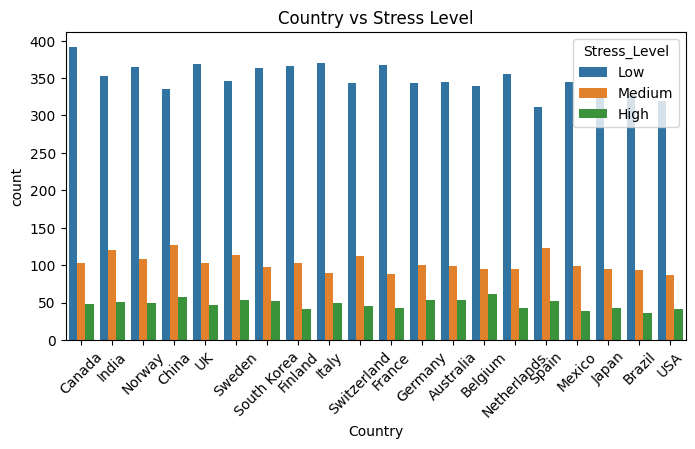

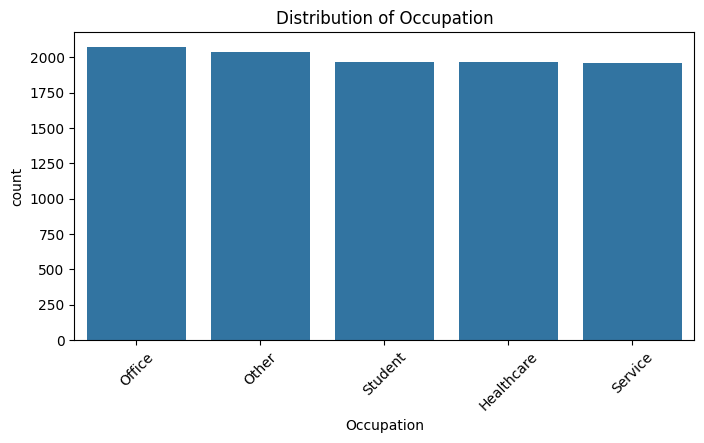

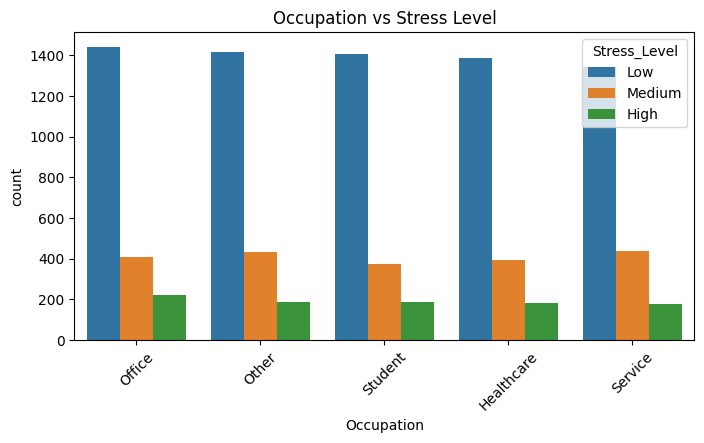

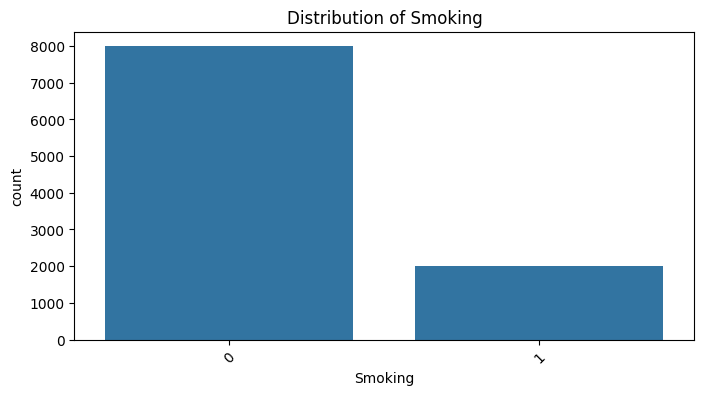

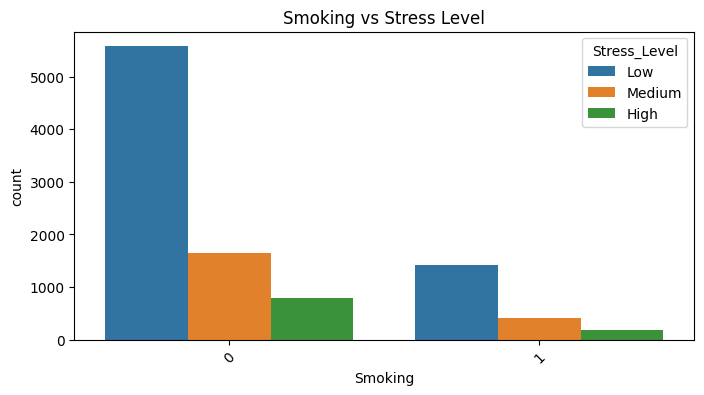

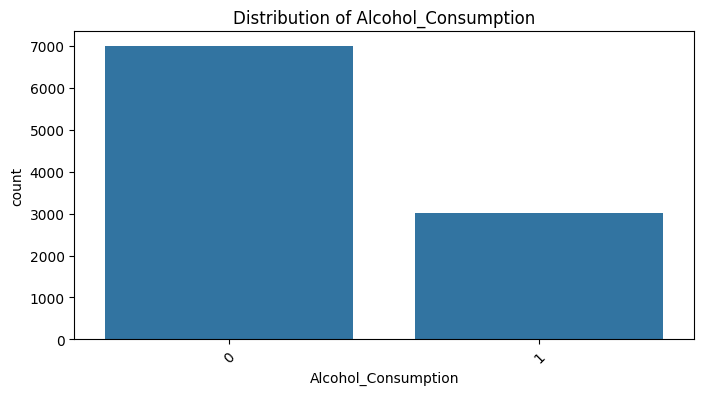

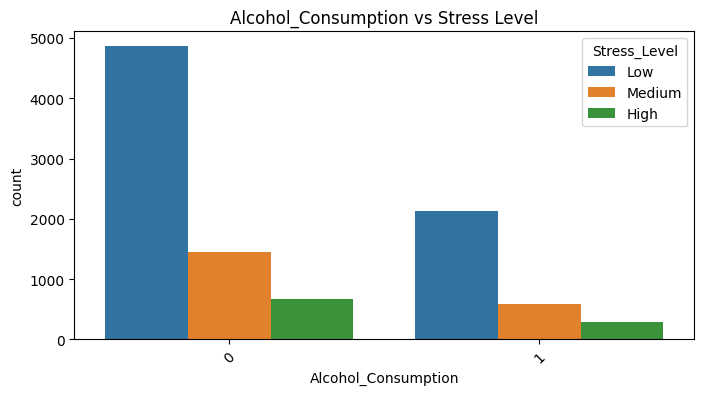

In [17]:
cat_cols = ["Gender", "Country", "Occupation", "Smoking", "Alcohol_Consumption"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,
                  data=health_df,
                  order=health_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8,4))
    sns.countplot(x=col,
                  hue="Stress_Level",
                  data=health_df,
                  order=health_df[col].value_counts().index)
    plt.title(f"{col} vs Stress Level")
    plt.xticks(rotation=45)
    plt.show()

Correlation Analysis

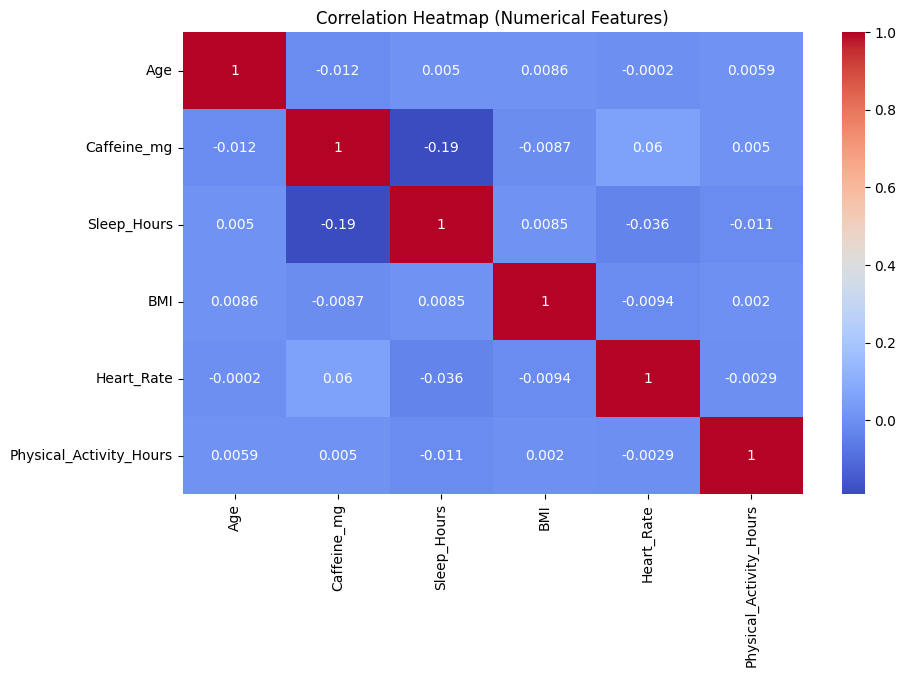

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(health_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Country Insights

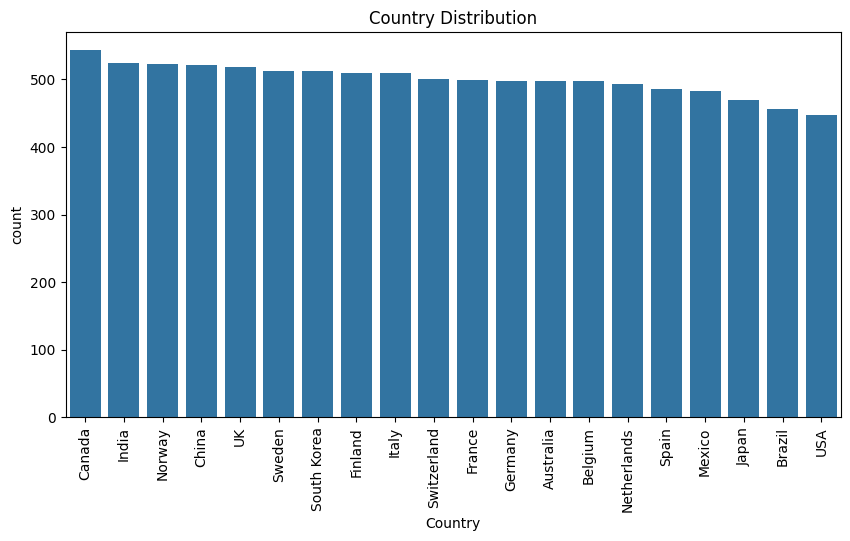

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="Country",
              data=health_df,
              order=health_df["Country"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Country Distribution")
plt.show()

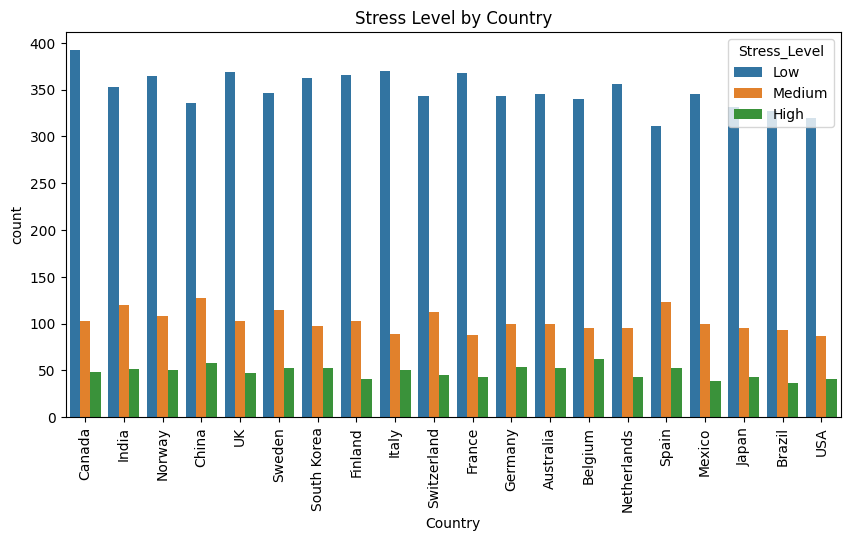

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="Country",
              hue="Stress_Level",
              data=health_df,
              order=health_df["Country"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Stress Level by Country")
plt.show()

Summary of Insights
Stress_Level is imbalanced:

Low: ~70%
Medium: ~20%
High: ~10%

This imbalance will cause most models to predict “Low” too often because it dominates. Hence, when instantiating estimators we will adjust class weights.

## Preprocessing Pipeline

In [21]:
!pip install category_encoders

In [41]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold
)
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from category_encoders import TargetEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import numpy as np

In [51]:
# Features and target
X = health_df.drop("Stress_Level", axis=1)
y = health_df["Stress_Level"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Identify columns
numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print(numeric_features)
print(categorical_features)

['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
['Gender', 'Country', 'Occupation']


In [53]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", TargetEncoder(cols=categorical_features), categorical_features)
])

# Compute sample weights for XGBoost
xgb_sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
xgb_sample_weights

array([0.4769692 , 0.4769692 , 0.4769692 , ..., 1.62601626, 0.4769692 ,
       0.4769692 ])

### Models + Param Grids (with Weight Adjustments)

In [54]:
model_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [None, 10, 20],
            "clf__class_weight": ["balanced"]
        },
        "fit_params": {}
    },
    "XGBoost": {
        "model": XGBClassifier(
            objective="multi:softprob",
            num_class=3,
            use_label_encoder=False,
            eval_metric="mlogloss",
            random_state=42
        ),
        "params": {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [3, 5, 7],
            "clf__learning_rate": [0.01, 0.1]
        },
        "fit_params": {"clf__sample_weight": xgb_sample_weights}
    },
    "LightGBM": {
        "model": lgb.LGBMClassifier(
            objective="multiclass",
            num_class=3,
            class_weight="balanced",
            random_state=42
        ),
        "params": {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [-1, 10]
        },
        "fit_params": {}
    }
}

## Modeling with weight adjustments

_Iterate through Models_

In [55]:
best_models = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in model_params.items():
    print(f"\n Running GridSearch for {name} (with class weights)...")

    # Build pipeline
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clf", mp["model"])
    ])

    # Grid search
    grid = GridSearchCV(
        pipe,
        mp["params"],
        cv=skf,
        scoring="f1_macro",
        n_jobs=-1
    )
    grid.fit(X_train, y_train_enc, **mp["fit_params"])

    print("Best params:", grid.best_params_)
    print("Best CV score:", grid.best_score_)

    # Save best model
    best_models[name] = grid.best_estimator_

    # Evaluate on test set
    y_pred = grid.best_estimator_.predict(X_test)
    print("\nTest Performance:")
    print(classification_report(y_test_enc, y_pred))
    print("="*54)


 Running GridSearch for RandomForest (with class weights)...
Best params: {'clf__class_weight': 'balanced', 'clf__max_depth': None, 'clf__n_estimators': 100}
Best CV score: 0.9704112615675158

Test Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       288
           1       0.99      0.99      0.99      2097
           2       0.96      0.95      0.96       615

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 Running GridSearch for XGBoost (with class weights)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:51:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best CV score: 0.970264603502778

Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       288
           1       0.99      0.99      0.99      2097
           2       0.96      0.95      0.96       615

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 Running GridSearch for LightGBM (with class weights)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Modeling with SMOTE

_Iterate through Models_

In [56]:
# SMOTE (upsample minority classes)
smote = SMOTE(random_state=42)

best_models = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in model_params.items():
    print(f"\n Running GridSearch for {name} (with SMOTE)...")

    # Build pipeline (with SMOTE)
    pipe = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", smote),
        ("clf", mp["model"])
    ])

    # Grid search
    grid = GridSearchCV(
        pipe,
        mp["params"],
        cv=skf,
        scoring="f1_macro",
        n_jobs=-1
    )
    grid.fit(X_train, y_train_enc)

    print("Best params:", grid.best_params_)
    print("Best CV score:", grid.best_score_)

    # Save best model
    best_models[name] = grid.best_estimator_

    # Evaluate on test set
    y_pred = grid.best_estimator_.predict(X_test)
    print("\nTest Performance:")
    print(classification_report(y_test_enc, y_pred))
    print("="*54)


 Running GridSearch for RandomForest (with SMOTE)...
Best params: {'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__n_estimators': 100}
Best CV score: 0.9704662884385055

Test Performance:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       288
           1       0.99      0.99      0.99      2097
           2       0.97      0.92      0.95       615

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 Running GridSearch for XGBoost (with SMOTE)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:53:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 200}
Best CV score: 0.9717080158422942

Test Performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       288
           1       0.99      0.99      0.99      2097
           2       0.96      0.94      0.95       615

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 Running GridSearch for LightGBM (with SMOTE)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2277
[LightGBM] [Info] Number of data points in the train set: 14676, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] St

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Conclusion

The winning model is selected based on:

- The **Macro F1** as the main selection metric. It ensures your model does well on all of Low, Medium, High.

- **Macro recall**

- **Recall for the High stress** (2) group (since false negatives here could be critical).

Based on this, LightGBM with SMOTE (upsampled data) is the winning model as it outperforms others with values for Macro F1, Macro Recall and Recall for High stress class (2) as **0.97, 0.98, 0.95**